# random forest

ensable learning - we train multiple model together to solve one problem
Bagging (boostrap aggregation)- models train parallaly. to reduce variance      
                                to prevent overfitting.
    > random forest, contains multiple decision trees algo.
boosting - models train sequentialy. to reduce bias. to prevent undrefitting.
    XG boost -
    Gradient boost - 
    X boost - 

In [75]:
import pandas as pd

In [76]:
df = pd.read_csv("loan_approval_dataset.csv")

In [77]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [78]:
df.shape

(4269, 13)

In [79]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.drop(columns=['loan_id'], inplace=True)

In [82]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [83]:
df.columns = df.columns.str.strip()

In [84]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

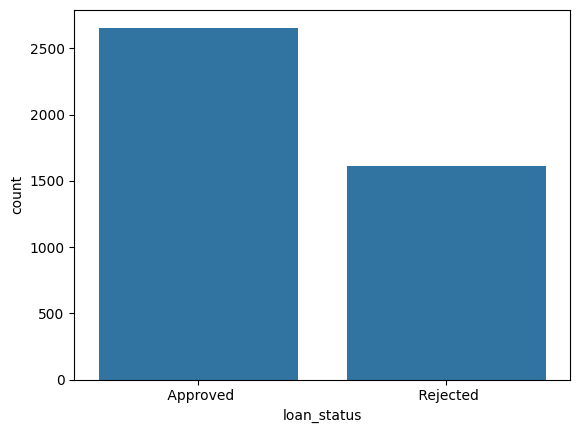

In [85]:
import seaborn as sns
sns.countplot(x='loan_status', data=df)

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
lb = LabelEncoder()

In [88]:
df['loan_status'] = lb.fit_transform(df['loan_status'])

In [89]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [90]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [94]:
catcols = x.select_dtypes(include='object').columns.to_list()
numcols = x.select_dtypes(include=['int64','float64']).columns.to_list()

In [100]:
processor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numcols),
        # ('cat', LabelEncoder(), catcols)
        ('ohe', OneHotEncoder(handle_unknown='ignore'), catcols)
    ],
    remainder='passthrough'
)

In [101]:
model = Pipeline(
    steps=[
        ('preprocessor',processor),
        # ('lb', LabelEncoder()),
        # ('ss',StandardScaler()),
        ('rfc', RandomForestClassifier(random_state=42))
    ]
)

In [102]:
model.fit(xtrain, ytrain)

,steps,"[('preprocessor', ...), ('rfc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('ohe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [103]:
model.score(xtest, ytest)

0.9773614363778298

In [104]:
from sklearn.metrics import classification_report

In [105]:
pred = model.predict(xtest)

In [106]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       810
           1       0.98      0.96      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281

